In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
from biasvariance_toolkit import estimate_bias_variance_mse

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
def generate_sinusoid_data(num_samples:int,noise_scale:float=0.2):
    X = np.linspace(-1,1,num_samples).reshape(-1, 1)
    y_true = np.sin(2 * np.pi * X)                       # shape: (num_samples, 1)
    noise = np.random.normal(0, noise_scale, size=(num_samples, 1))#random gaussian noise
    y = y_true + noise
    return X,y

In [6]:
import torch
import torch.nn as nn

class MLPRegressor(nn.Module):
    def __init__(self, input_dim, hidden_dim, depth, output_dim=1):
        super().__init__()
        layers = []
        layers.append(nn.Linear(input_dim, hidden_dim))
        layers.append(nn.ReLU())
        for _ in range(depth - 1):
            layers.append(nn.Linear(hidden_dim, hidden_dim))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(hidden_dim, output_dim))
        self.net = nn.Sequential(*layers)
        
    def forward(self, x):
        return self.net(x)


In [7]:
num_samples = [100,500,1000,5000,10000,20000,30000]
hidden_units = 128
depth = 1
X_test,y_test = generate_sinusoid_data(num_samples=5000,noise_scale=0)

In [27]:
print(y_full[:50])

[[ 0.57867768]
 [ 0.39247037]
 [-0.05208327]
 [ 0.20098535]
 [-0.12658895]
 [ 0.13959092]
 [-0.0143412 ]
 [ 0.01687522]
 [ 0.31280031]
 [ 0.17724879]
 [ 0.83910013]
 [ 0.1240581 ]
 [ 0.18570443]
 [ 0.12080059]
 [-0.39320512]
 [ 0.12971593]
 [-0.55418724]
 [ 0.3661924 ]
 [-0.61045716]
 [ 0.23380048]
 [ 0.05848624]
 [ 0.20503632]
 [ 0.24017839]
 [-0.22171909]
 [-0.41857216]
 [-0.05422811]
 [ 0.84661263]
 [ 0.17749458]
 [ 0.0300894 ]
 [ 0.21205881]
 [-0.40173538]
 [ 0.28899748]
 [-0.02317198]
 [ 0.22421487]
 [ 0.02942701]
 [ 0.84955243]
 [ 0.1495057 ]
 [ 0.3496006 ]
 [-0.30715508]
 [-0.444756  ]
 [ 0.67029144]
 [-0.5065149 ]
 [ 0.32071164]
 [-0.11832947]
 [ 0.07522165]
 [-0.13248989]
 [ 0.30294057]
 [ 0.30021643]
 [ 0.02631687]
 [ 0.43809809]]


In [ ]:
dataset_results = []
for sample_size in num_samples:
    print(f' Training with sample size as {sample_size}')
    X_train, y_train = generate_sinusoid_data(num_samples=sample_size,noise_scale=0.3)
    bias_sq, variance, total_error,error_sum,avg_train_loss,test_loss = estimate_bias_variance_mse(
            model_class=MLPRegressor,
            X_train=X_train,
            y_train=y_train,
            X_test=X_test,
            y_test=y_test,
            loss_fn=nn.MSELoss(),
            model_kwargs={'input_dim':X_train.shape[1],"hidden_dim":hidden_units,'depth':depth},
            num_models=30,
            max_epochs=1000,
            patience=1000,
            lr=0.001,
            batch_size=256
        )
    dataset_results.append({
        'bias2':bias_sq,
        'variance':variance,
        'total_error':total_error,
        'avg_train_loss':avg_train_loss,
        'dataset_size':sample_size,
        'test_loss':test_loss,
        'error_sum':error_sum
    })

 Training with sample size as 100

--- Training Model 1/30 ---

--- Training Model 2/30 ---

--- Training Model 3/30 ---

--- Training Model 4/30 ---

--- Training Model 5/30 ---


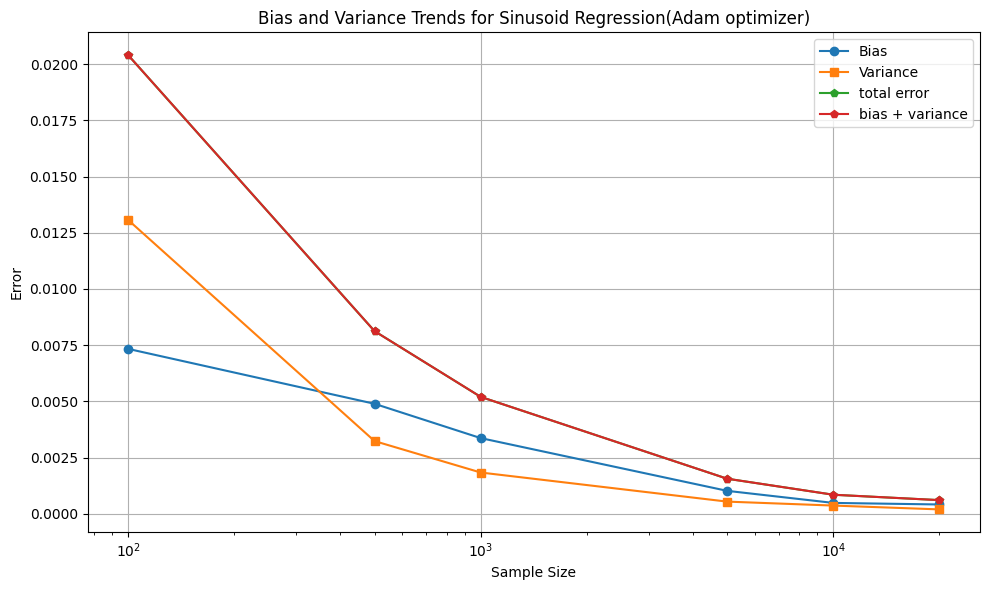

In [13]:
num_samples = [100,500,1000,5000,10000,20000]
bias_values = [res['bias2'] for res in dataset_results]
variance_values = [res['variance'] for res in dataset_results]
error_values = [res['total_error'] for res in dataset_results]
bias_plus_variance = [res['bias2+variance'] for res in dataset_results]
    
plt.figure(figsize=(10, 6))
plt.plot(num_samples, bias_values, marker='o', label='Bias')
plt.plot(num_samples, variance_values, marker='s', label='Variance')
plt.plot(num_samples, error_values, marker='p', label='total error')
plt.plot(num_samples, bias_plus_variance, marker='p', label='bias + variance')

    
plt.xscale('log')
plt.xlabel('Sample Size')
plt.ylabel('Error')
plt.title('Bias and Variance Trends for Sinusoid Regression(Adam optimizer)')
plt.legend()
plt.grid(True)
plt.tight_layout()

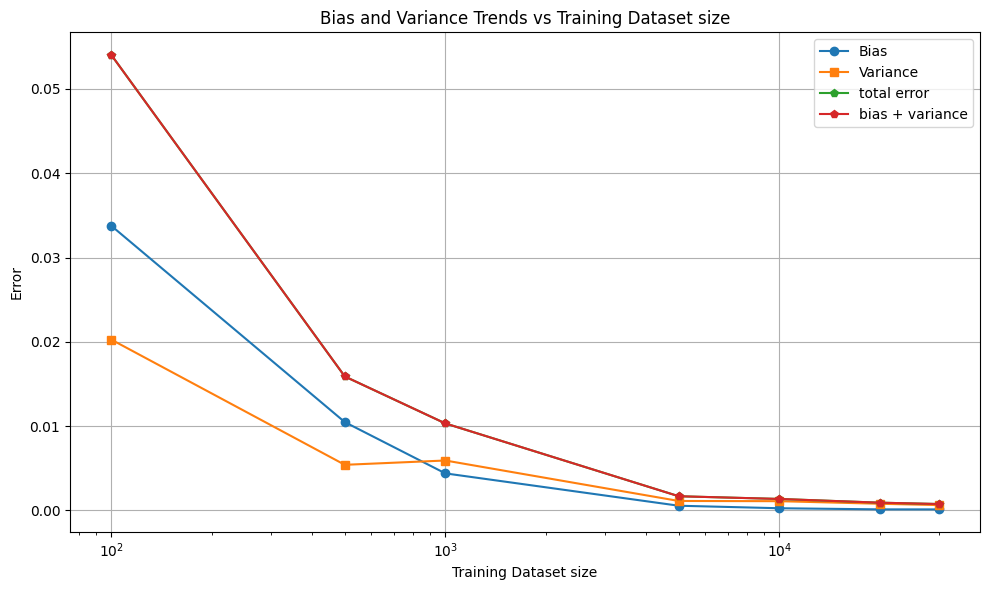

In [22]:
bias_values = [res['bias2'] for res in dataset_results]
variance_values = [res['variance'] for res in dataset_results]
error_values = [res['total_error'] for res in dataset_results]
bias_plus_variance = [res['error_sum'] for res in dataset_results]
    
plt.figure(figsize=(10, 6))
plt.plot(num_samples, bias_values, marker='o', label='Bias')
plt.plot(num_samples, variance_values, marker='s', label='Variance')
plt.plot(num_samples, error_values, marker='p', label='total error')
plt.plot(num_samples, bias_plus_variance, marker='p', label='bias + variance')

    
plt.xscale('log')
plt.xlabel('Training Dataset size')
plt.ylabel('Error')
plt.title('Bias and Variance Trends vs Training Dataset size')
plt.legend()
plt.grid(True)
plt.tight_layout()

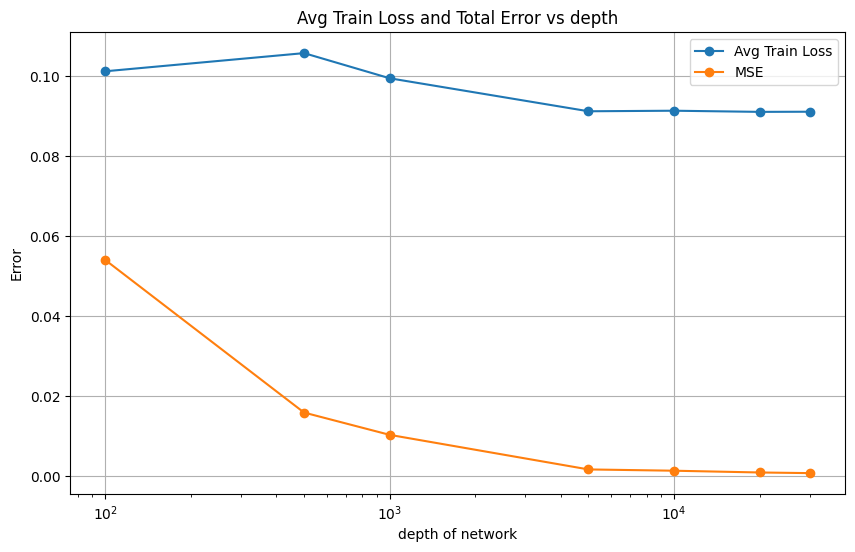

In [27]:
test_loss = [r['total_error'] for r in dataset_results]
avg_train_loss = [r['avg_train_loss'] for r in dataset_results]

plt.figure(figsize=(10, 6))
plt.plot(num_samples, avg_train_loss, marker='o', label='Avg Train Loss')
plt.plot(num_samples, test_loss, marker='o', label='MSE')
plt.xscale('log')  # Log scale for hidden units
plt.xlabel('depth of network')
plt.ylabel('Error')
plt.title('Avg Train Loss and Total Error vs depth')
plt.legend()
plt.grid(True)
plt.show()


In [1]:
test_loss = [r['total_error'] for r in dataset_results]
avg_train_loss = [r['avg_train_loss'] for r in dataset_results]

plt.figure(figsize=(10, 6))
plt.plot(num_samples, avg_train_loss, marker='o', label='Avg Train Loss')
plt.plot(num_samples, test_loss, marker='o', label='MSE')
plt.xscale('log')  # Log scale for hidden units
plt.xlabel('Training Data size')
plt.ylabel('Error')
plt.title('Avg Train Loss and Total Error vs depth')
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'dataset_results' is not defined